In [1]:
import pandas as pd

In [86]:
data = pd.read_csv('assignment_ds_marketing.csv')

In [3]:
data.head()

,visit_date,destinations,visitors,language,is_focus
0,2019-03-01,aaa,6.508048,en,0
1,2019-04-01,aab,2.099370,en,0
2,2019-01-01,aac,44.086774,en,0
3,2018-05-01,aad,0.209937,en,0
4,2019-06-01,aae,100.349895,de,0


In [ ]:
### Convert visit_date to a datetime format
data['visit_date'] = pd.to_datetime(data['visit_date'],format='%Y-%m-%d)

In [4]:
data.shape

(93273, 5)

## Dealing with only Focus group

In [5]:
data = data[data['is_focus']==1]

In [6]:
data.shape

(90, 5)

## Pre SEO engagement analysis

In [10]:
# filter date to range of before SEO
before_seo = data[(data['visit_date']<'2019-01-01')] 

In [18]:
# number of records
before_seo.shape[0]

40

In [11]:
before_seo.head()

,visit_date,destinations,visitors,language,is_focus
70,2018-06-01,acm,189.153254,en,1
487,2018-09-01,aak,44.926522,en,1
685,2018-10-01,acm,186.634010,en,1
1519,2018-05-01,aiw,82.295311,en,1
2077,2018-05-01,apy,91.322603,en,1


In [13]:
# get destinations
list(before_seo.destinations.unique())

['acm', 'aak', 'aiw', 'apy', 'abd']

In [114]:
# create a dataframe calculating visitors per destination 
before_destination = pd.DataFrame(before_seo.groupby(['destinations'])['visitors'].sum().reset_index(name = "Total visitors before"))

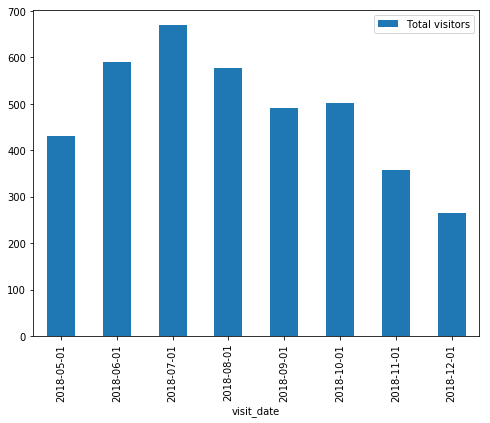

In [109]:
# create and plot dataframe to show sum of visitors per month
pd.DataFrame(before_seo.groupby(['visit_date'])['visitors'].sum().reset_index(name = "Total visitors")).plot(x="visit_date", y=["Total visitors"], kind="bar",figsize=(8, 6)).get_figure().savefig('test.png')

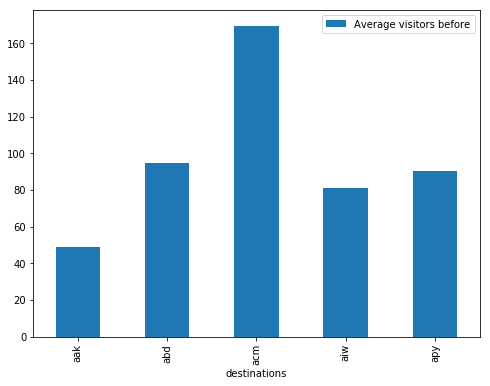

In [110]:
# create dataframe to show average visitors per destination

pd.DataFrame(before_seo.groupby(['destinations'])['visitors'].mean().reset_index(name = "Average visitors before")).plot(x="destinations", y=["Average visitors before"], kind="bar",figsize=(8, 6))

In [24]:
print('The Total number of visitors before the seo engagement:{}'.format(before_seo['visitors'].sum()))

The Total number of visitors before the seo engagement:3877.536738978306


## Post SEO engagement

In [25]:
# Select date range 

after_seo = data[(data['visit_date']>='2019-01-01')] 
after_seo.head()

,visit_date,destinations,visitors,language,is_focus
467,2019-05-01,aak,77.256823,en,1
709,2019-02-01,aiw,113.365990,en,1
720,2019-08-01,aiw,95.311407,en,1
784,2019-01-01,apy,65.710287,en,1
1051,2019-04-01,aak,64.870539,en,1


In [113]:
print('The Total number of visitors before the seo engagement:{}'.format(after_seo['visitors'].sum()))

The Total number of visitors before the seo engagement:5241.49755073478


In [34]:
after_seo.shape

(50, 5)

In [29]:
# create dataframe for total visitors after 
after_destination = pd.DataFrame(after_seo.groupby(['destinations'])['visitors'].sum().reset_index(name = "Total visitors after"))

In [37]:
# merge dataframe with before seo on destinations 


post_destination = before_destination.merge(after_destination,on='destinations')

In [38]:
# calculate percentage change

post_destination['Percentage Change'] = (post_destination['Total visitors before'] - post_destination['Total visitors after'])/post_destination['Total visitors before'] * 100

In [39]:
post_destination

,destinations,Total visitors before,Total visitors after,Percentage Change
0,aak,391.952414,781.175647,-99.303696
1,abd,759.552134,1002.659202,-32.006633
2,acm,1355.773268,1615.045486,-19.123568
3,aiw,649.335199,1004.758572,-54.736502
4,apy,720.923723,837.858642,-16.220151


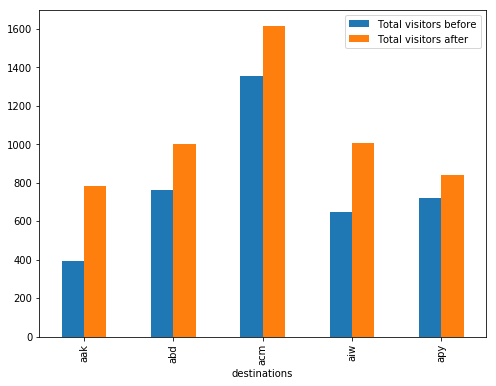

In [112]:
# Plot visitors per destination

post_destination.plot(x="destinations", y=["Total visitors before", "Total visitors after"], kind="bar",figsize=(8, 6))

In [51]:
# Calculate average per destination after SEO

avg_dest_after = pd.DataFrame(after_seo.groupby(['destinations'])['visitors'].mean().reset_index(name = "Average visitors after"))

In [50]:
#  Calculate average per destination before SEO

avg_dest_before = pd.DataFrame(before_seo.groupby(['destinations'])['visitors'].mean().reset_index(name = "Average visitors before"))

In [55]:
# Merge two dataframes in cells above

average_destination = avg_dest_before.merge(avg_dest_after,on='destinations')
average_destination['Increase/Decrease'] = (average_destination['Average visitors after']-average_destination['Average visitors before'])
average_destination

,destinations,Average visitors before,Average visitors after,Increase/Decrease
0,aak,48.994052,78.117565,29.123513
1,abd,94.944017,100.265920,5.321903
2,acm,169.471659,161.504549,-7.967110
3,aiw,81.166900,100.475857,19.308957
4,apy,90.115465,83.785864,-6.329601


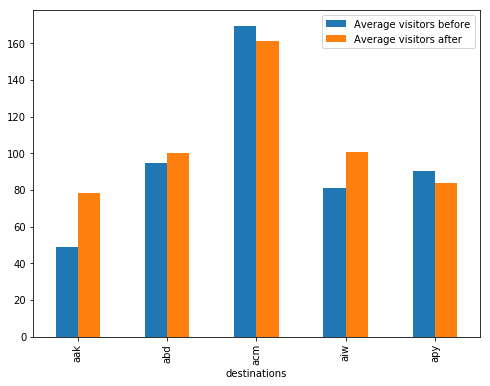

In [111]:
# Average Destination visitors  plot

average_destination.plot(x="destinations", y=["Average visitors before", "Average visitors after"], kind="bar",figsize=(8, 6))

From the table above destinations **aak, abd, aiw** had an increase in average monthly visitors.

Destinations **acm** and **apy** has a decrease in monthly visitors

In [82]:
print('The average number of visitors before the SEO was {0} and after the SEO it was {1}'.format(before_seo['visitors'].mean(),after_seo['visitors'].mean()))

The average number of visitors before the SEO was 96.93841847445769 and after the SEO it was 104.82995101469561


## Questions

#### 1- Are you able to determine whether the efforts of the off-page SEO team were successful? 

The efforts of the SEO team were successful for some destination sites (aak, abd, aiw) as we noticed an increase in average monthly visitors, while on some destinations (acm, apy) had a slight drop.

Generally before the SEO there was an average monthly visit of 96.94 and after the SEO there was a increase in to 104.83.

From the conclusions drawn the SEO team were successful.

#### 2- If you believe the provided dataset is not enough to answer the question, what other data points would you want to look at? Why?

Bounce rate - To get more sense on the traffic drawn to the page, to know if they navigated away after landing on the page

## Visualisation of visits

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
data = data.set_index('visit_date')

In [62]:
data.head(2)

,destinations,visitors,language,is_focus
visit_date,,,,
2018-06-01,acm,189.153254,en,1
2019-05-01,aak,77.256823,en,1


In [67]:
data_plot = data[['visitors']]

In [68]:
data_plot.head()

,visitors
visit_date,
2018-06-01,189.153254
2019-05-01,77.256823
2018-09-01,44.926522
2018-10-01,186.634010
2019-02-01,113.365990


In [74]:
data_plot = pd.DataFrame(data_plot.groupby(['visit_date'])['visitors'].sum())

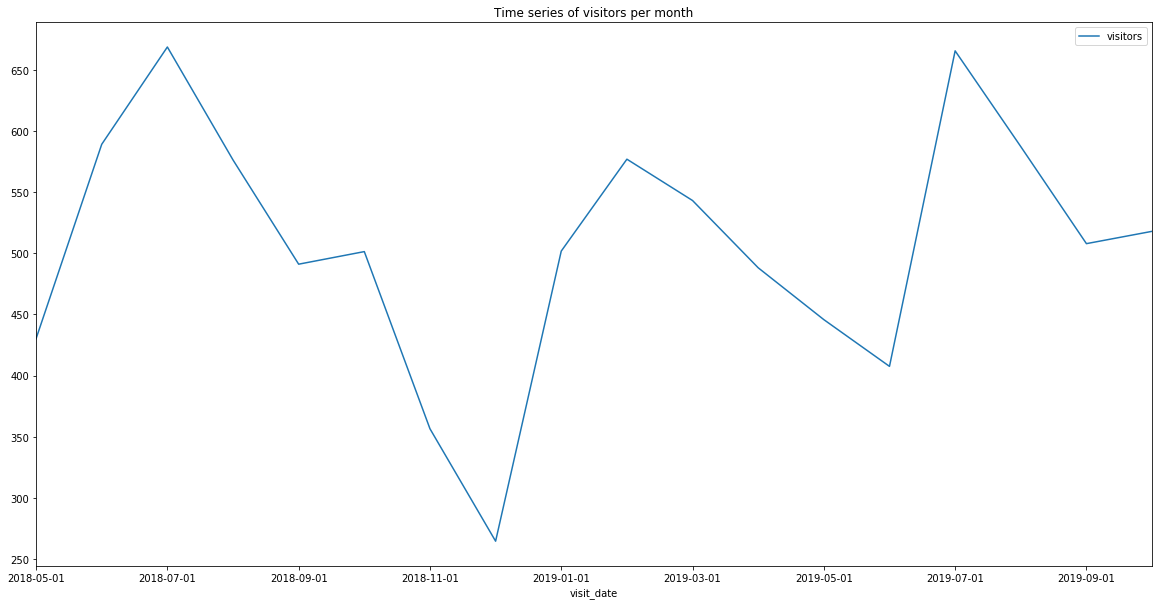

In [85]:
data_plot.plot(figsize=(20,10),title='Time series of visitors per month')

The time series plot above shows the **total** visitors per month